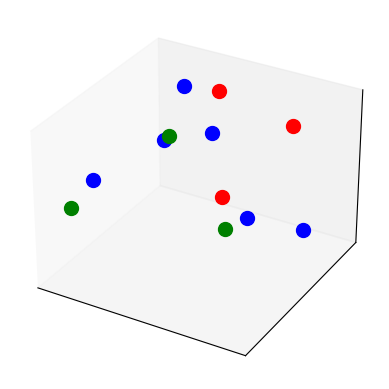

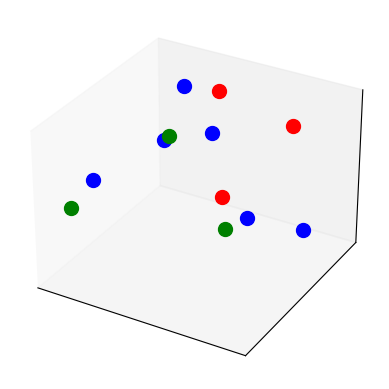

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
from itertools import combinations
import random
from mpl_toolkits.mplot3d import Axes3D

# Constants
BOX_WIDTH = 100
BOX_HEIGHT = 100
BOX_LENGTH = 100
NUM_PARTICLES = 4
PARTICLE_RADIUS = 3  # This needs to be added to the Particle class
INITIAL_SPEED = 3
STEPS = 400

# Particle class with radius
class Particle:
    def __init__(self, species, x, y, z, vx, vy, vz, radius=PARTICLE_RADIUS):
        self.species = species
        self.x = x
        self.y = y
        self.z = z
        self.vx = vx
        self.vy = vy
        self.vz = vz
        self.radius = radius  # Adding radius to the Particle

# Initialize particles with random angles
particles = []
species_types = ['A', 'B', 'C']
species_colors = {'A': 'r', 'B': 'g', 'C': 'b'}

for species in species_types:
    for _ in range(NUM_PARTICLES):
        angle_theta = random.uniform(0, 2 * np.pi)
        angle_phi = random.uniform(0, np.pi)
        v_x = INITIAL_SPEED * np.sin(angle_phi) * np.cos(angle_theta)
        v_y = INITIAL_SPEED * np.sin(angle_phi) * np.sin(angle_theta)
        v_z = INITIAL_SPEED * np.cos(angle_phi)
        particle = Particle(species,
                            random.uniform(PARTICLE_RADIUS, BOX_WIDTH - PARTICLE_RADIUS),
                            random.uniform(PARTICLE_RADIUS, BOX_HEIGHT - PARTICLE_RADIUS),
                            random.uniform(PARTICLE_RADIUS, BOX_LENGTH - PARTICLE_RADIUS),
                            v_x, v_y, v_z,
                            PARTICLE_RADIUS)
        particles.append(particle)

def update_positions(particles):
    for particle in particles:
        particle.x += particle.vx
        particle.y += particle.vy
        particle.z += particle.vz
        # Bounce off walls
        if particle.x > BOX_WIDTH - PARTICLE_RADIUS or particle.x < PARTICLE_RADIUS:
            particle.vx *= -1
        if particle.y > BOX_HEIGHT - PARTICLE_RADIUS or particle.y < PARTICLE_RADIUS:
            particle.vy *= -1
        if particle.z > BOX_LENGTH - PARTICLE_RADIUS or particle.z < PARTICLE_RADIUS:
            particle.vz *= -1

def handle_collisions(particles):
    for p1, p2 in combinations(particles, 2):
        dx = p1.x - p2.x
        dy = p1.y - p2.y
        dz = p1.z - p2.z
        distance = np.sqrt(dx**2 + dy**2 + dz**2)

        if distance < (p1.radius + p2.radius):
            n = np.array([dx, dy, dz]) / distance
            v1i = np.array([p1.vx, p1.vy, p1.vz])
            v2i = np.array([p2.vx, p2.vy, p2.vz])
            
            v1n = np.dot(v1i, n) * n
            v2n = np.dot(v2i, n) * n
            
            v1t = v1i - v1n
            v2t = v2i - v2n
            
            v1nf = v2n
            v2nf = v1n
            
            # Update velocities
            p1.vx, p1.vy, p1.vz = v1nf + v1t
            p2.vx, p2.vy, p2.vz = v2nf + v2t

            # Change species after collision based on rules
            if {p1.species, p2.species} == {'A', 'B'}:
                p1.species = 'C'
                p2.species = 'C'
            elif {p1.species, p2.species} == {'A', 'C'}:
                p1.species = 'B'
                p2.species = 'B'
            elif {p1.species, p2.species} == {'B', 'C'}:
                p1.species = 'A'
                p2.species = 'A'
            # If same species collide, no change in species
            
def animate(i):
    update_positions(particles)
    handle_collisions(particles)
    ax.clear()  # Clear previous frame.
    
    # Re-set plot limits and labels.
    ax.set_xlim(0, BOX_WIDTH)
    ax.set_ylim(0, BOX_HEIGHT)
    ax.set_zlim(0, BOX_LENGTH)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    
    # Re-plot particles in their new positions with potentially updated species/colors.
    for particle in particles:
        ax.scatter(particle.x, particle.y, particle.z, color=species_colors[particle.species], s=100)

# Set up the figure for 3D animation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(0, BOX_WIDTH)
ax.set_ylim(0, BOX_HEIGHT)
ax.set_zlim(0, BOX_LENGTH)

# Initializing scatter plot for particles
scatters = [ax.scatter(p.x, p.y, p.z, color=species_colors[p.species], s=100) for p in particles]
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
# Create the animation object
animation_file_path = 'particle_simulation_with_paths20.gif'
anim = FuncAnimation(fig, animate, frames=STEPS, interval=20, blit=False)
anim.save(animation_file_path, writer=PillowWriter(fps=30))
plt.show()

def save_final_state_3d(particles):
    # Create a new figure for the 3D plot
    fig_3d = plt.figure()
    ax_3d = fig_3d.add_subplot(111, projection='3d')
    
    # Set the limits and aspect of the 3D plot
    ax_3d.set_xlim(0, BOX_WIDTH)
    ax_3d.set_ylim(0, BOX_HEIGHT)
    ax_3d.set_zlim(0, BOX_LENGTH)
    ax_3d.set_xticks([])  # Remove x-axis labels
    ax_3d.set_yticks([])  # Remove y-axis labels
    ax_3d.set_zticks([])  # Remove z-axis labels
    
    # Plot each particle in its final position
    for particle in particles:
        ax_3d.scatter(particle.x, particle.y, particle.z, color=species_colors[particle.species], s=100)
    
    # Save the 3D plot to a file
    plt.savefig('final_state_3d.png')

# At the end of the script, after the animation has been created
save_final_state_3d(particles)

# To display the animation in the Jupyter Notebook
from IPython.display import Image
Image(url=animation_file_path)